## Step-1: Business Problem Understanding

### Import Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Step-2: Data Understanding
- **Data loading**

In [2]:
df=pd.read_excel('BlinkIt grocery Dataset.xlsx')
df=pd.DataFrame(df)
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [5]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [6]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [7]:
continuous=['Item Weight', 'Sales','Item Visibility']
Discreate=['Outlet Establishment Year','Rating']
Categorical =['Item Fat Content','Item Type','Outlet Identifier']

# Exploratory Data Analysis (EDA)

In [8]:
df[continuous].describe()

,Item Weight,Sales,Item Visibility
count,7060.000000,8523.000000,8523.000000
mean,12.857645,140.992783,0.066132
std,4.643456,62.275067,0.051598
min,4.555000,31.290000,0.000000
25%,8.773750,93.826500,0.026989
50%,12.600000,143.012800,0.053931
75%,16.850000,185.643700,0.094585
max,21.350000,266.888400,0.328391


In [9]:
df[continuous].corr()

,Item Weight,Sales,Item Visibility
Item Weight,1.000000,0.027141,-0.014048
Sales,0.027141,1.000000,-0.001315
Item Visibility,-0.014048,-0.001315,1.000000


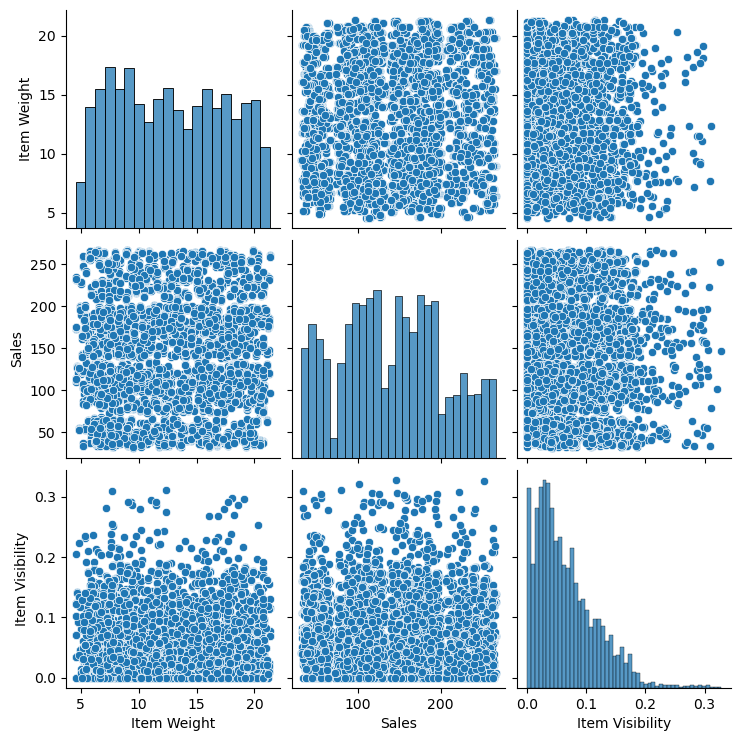

In [10]:
sns.pairplot(df[continuous])

# continuous variables

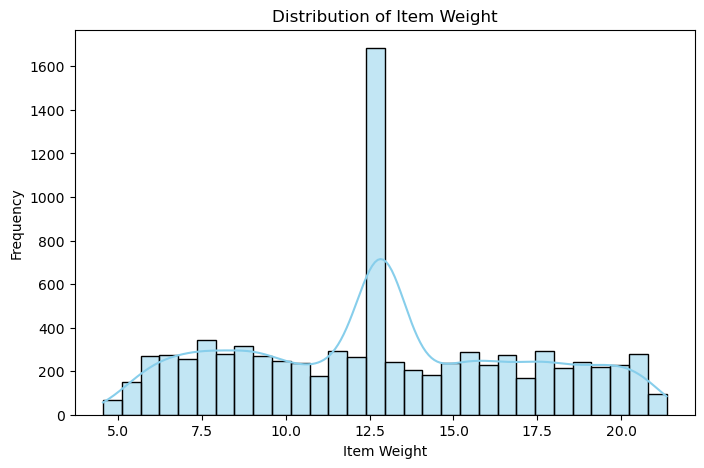

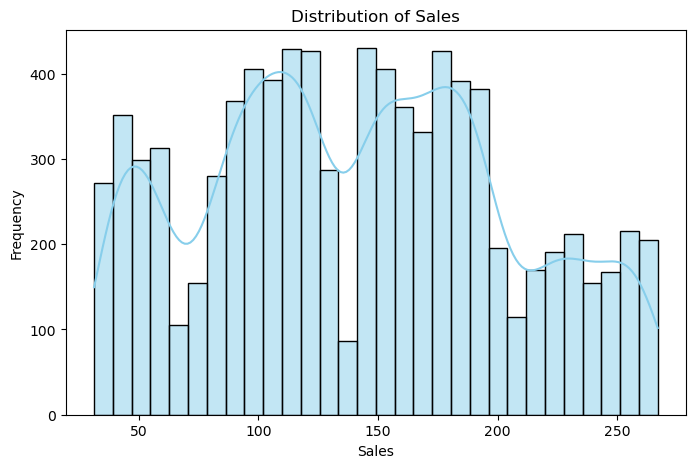

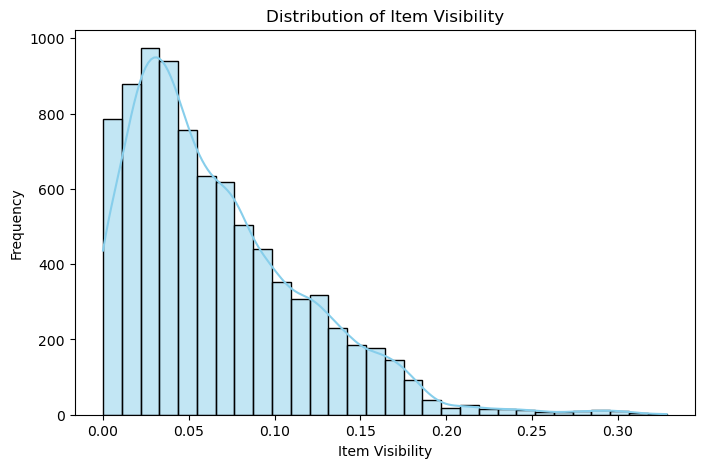

In [55]:
# Histogram for continuous variables
for col in ['Item Weight', 'Sales', 'Item Visibility']:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


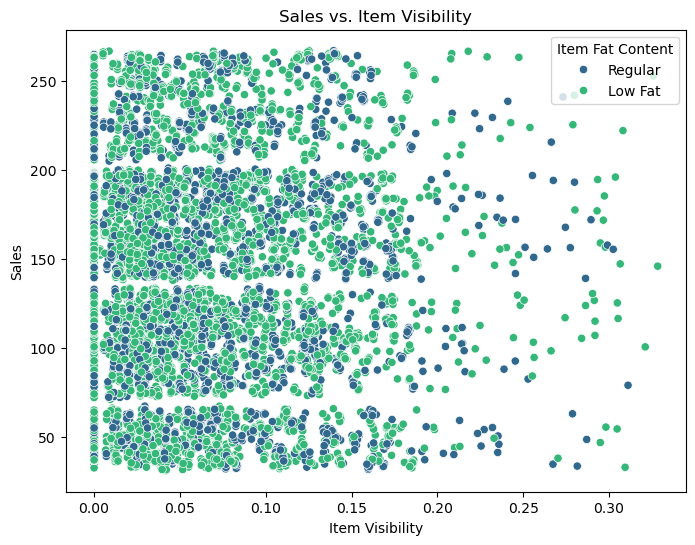

In [56]:
# Scatter plot: Sales vs. Item Visibility
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Item Visibility', y='Sales', hue='Item Fat Content', palette='viridis')
plt.title('Sales vs. Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.show()

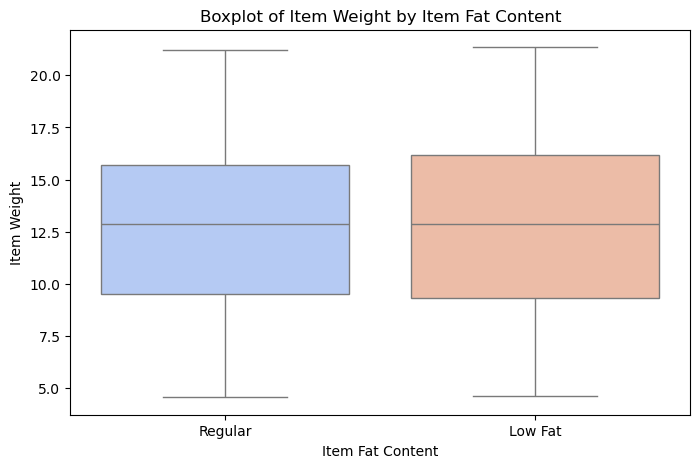

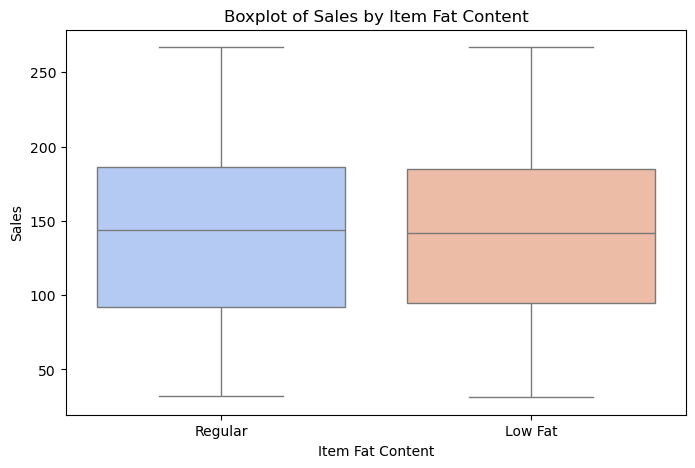

In [57]:
# Boxplot for continuous variables
for col in ['Item Weight', 'Sales']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Item Fat Content', y=col, palette='coolwarm')
    plt.title(f'Boxplot of {col} by Item Fat Content')
    plt.xlabel('Item Fat Content')
    plt.ylabel(col)
    plt.show()


# Discrete Variables

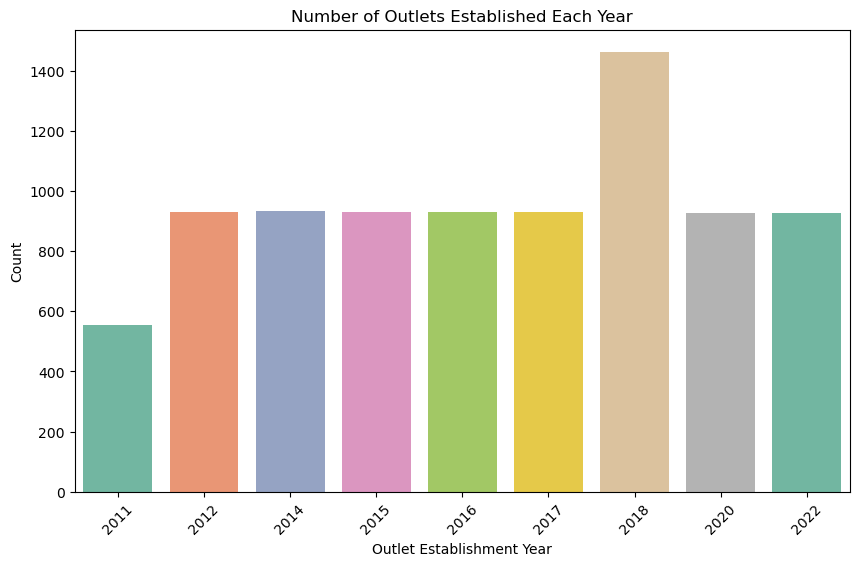

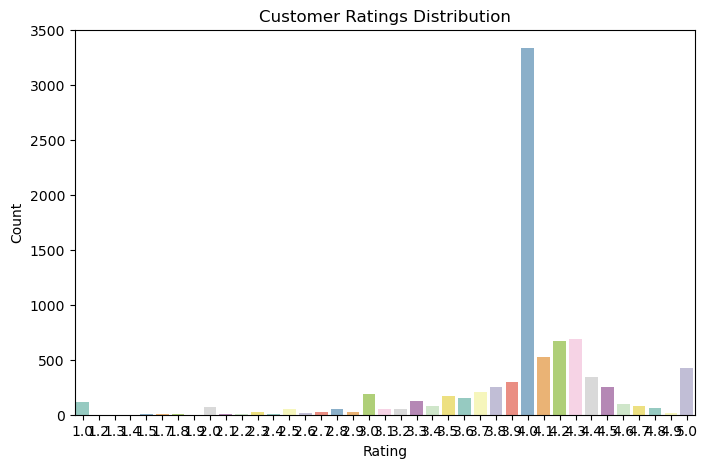

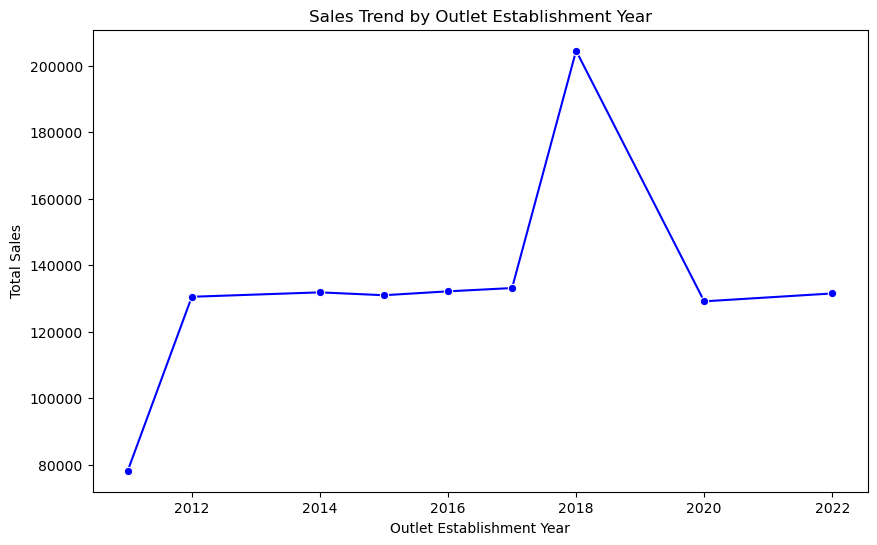

In [58]:
# Bar plot for Outlet Establishment Year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Outlet Establishment Year', palette='Set2')
plt.title('Number of Outlets Established Each Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Rating', palette='Set3')
plt.title('Customer Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Line chart for Outlet Establishment Year vs. Sales
outlet_sales = df.groupby('Outlet Establishment Year')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=outlet_sales, x='Outlet Establishment Year', y='Sales', marker='o', color='blue')
plt.title('Sales Trend by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.show()


# Categorical Variables

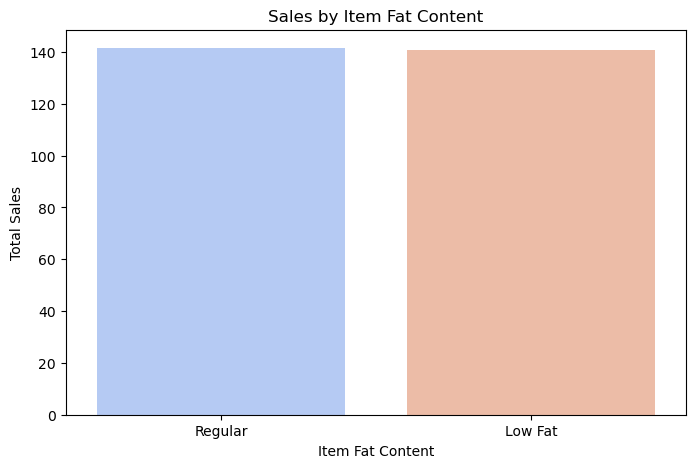

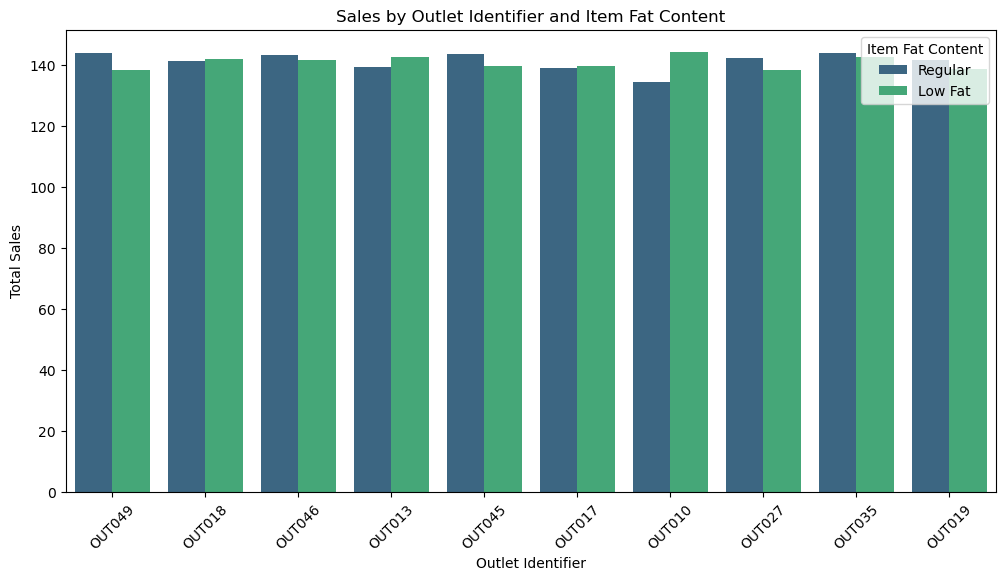

In [61]:
# Bar plot for Item Fat Content
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Item Fat Content', y='Sales', ci=None, palette='coolwarm')
plt.title('Sales by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Total Sales')
plt.show()

# Clustered Bar Chart: Outlet Identifier vs. Sales
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Outlet Identifier', y='Sales', ci=None, hue='Item Fat Content', palette='viridis')
plt.title('Sales by Outlet Identifier and Item Fat Content')
plt.xlabel('Outlet Identifier')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [11]:
df[Discreate].value_counts().sum()

8523

In [12]:
df['Rating'].unique()

array([5. , 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1, 4. , 3.9, 3.8,
       3.7, 3.6, 3.5, 3.4, 3.3, 3.2, 3.1, 3. , 2.9, 2.8, 2.7, 2.6, 2.5,
       2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.8, 1.7, 1.5, 1.4, 1.3, 1.2, 1. ])

In [13]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
df['Item Identifier'].unique()

array(['FDX32', 'NCB42', 'FDR28', ..., 'FDU60', 'NCX53', 'FDE52'],
      dtype=object)

In [15]:
df['Item Type'].unique()

array(['Fruits and Vegetables', 'Health and Hygiene', 'Frozen Foods',
       'Canned', 'Soft Drinks', 'Household', 'Snack Foods', 'Meat',
       'Breads', 'Hard Drinks', 'Others', 'Dairy', 'Breakfast',
       'Baking Goods', 'Seafood', 'Starchy Foods'], dtype=object)

In [16]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [17]:
df['Outlet Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [18]:
df.shape

(8523, 12)

In [19]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

# Data cleaning

In [20]:
df['Item Fat Content']=df['Item Fat Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat','reg':'Regular'})


In [21]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [22]:
df.duplicated().sum()

0

In [23]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [24]:
df['Item Weight'].fillna(df['Item Weight'].mean(), inplace=True)

In [25]:
#df['Item Weight'].fillna(0,inplace=True)
#df

In [26]:
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

In [29]:
# Assuming df is your cleaned DataFrame
df.to_excel('cleaned1.xlsx', index=False)

In [31]:
df['Sales'].sum()

1201681.4928

In [38]:
df1= pd.read_excel('Cleaned1.xlsx')
df1

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.100000,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.800000,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.850000,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.150000,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.600000,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,12.857645,164.5526,4.0
8519,Low Fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,12.857645,241.6828,4.0
8520,Low Fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,12.857645,86.6198,4.0
8521,Regular,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,12.857645,97.8752,4.0


# Blinkit Sales analysis KPI

In [39]:
df['Sales'].mean()

140.99278338613163

In [40]:
df['Sales'].value_counts().sum()

8523

In [41]:
df['Rating'].mean()

3.965857092573038

In [42]:
df1.groupby(['Item Fat Content'])['Sales'].sum()


Item Fat Content
Low Fat    776319.6884
Regular    425361.8044
Name: Sales, dtype: float64

In [43]:
df1.groupby(['Outlet Location Type'])['Sales'].sum()

Outlet Location Type
Tier 1    336397.8120
Tier 2    393150.6476
Tier 3    472133.0332
Name: Sales, dtype: float64

In [44]:
df1.groupby(['Item Type'])['Sales'].sum()

Item Type
Baking Goods              81894.7364
Breads                    35379.1198
Breakfast                 15596.6966
Canned                    90706.7290
Dairy                    101276.4616
Frozen Foods             118558.8814
Fruits and Vegetables    178124.0810
Hard Drinks               29334.6806
Health and Hygiene        68025.8388
Household                135976.5254
Meat                      59449.8638
Others                    22451.8916
Seafood                    9077.8700
Snack Foods              175433.9224
Soft Drinks               58514.1670
Starchy Foods             21880.0274
Name: Sales, dtype: float64

In [45]:
df1.groupby(['Outlet Location Type'])['Sales'].sum()

Outlet Location Type
Tier 1    336397.8120
Tier 2    393150.6476
Tier 3    472133.0332
Name: Sales, dtype: float64

In [46]:
df1.groupby(['Outlet Establishment Year'])['Sales'].sum()

Outlet Establishment Year
2011     78131.5666
2012    130476.8598
2014    131809.0156
2015    130942.7802
2016    132113.3698
2017    133103.9070
2018    204522.2570
2020    129103.9604
2022    131477.7764
Name: Sales, dtype: float64

In [47]:
df1.groupby(['Outlet Size'])['Sales'].sum()

Outlet Size
High      248991.5860
Medium    507895.7364
Small     444794.1704
Name: Sales, dtype: float64

In [48]:
df1.groupby(['Outlet Location Type'])['Sales'].sum()

Outlet Location Type
Tier 1    336397.8120
Tier 2    393150.6476
Tier 3    472133.0332
Name: Sales, dtype: float64

In [49]:
df1.groupby(['Outlet Type'])['Sales'].sum()

Outlet Type
Grocery Store        151939.1490
Supermarket Type1    787549.8928
Supermarket Type2    131477.7764
Supermarket Type3    130714.6746
Name: Sales, dtype: float64

In [50]:
df1.groupby(['Outlet Type'])['Sales'].mean()

Outlet Type
Grocery Store        140.294690
Supermarket Type1    141.213895
Supermarket Type2    141.678638
Supermarket Type3    139.801791
Name: Sales, dtype: float64

In [51]:
df['Outlet Type'].value_counts()

Outlet Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [52]:
df1.groupby(['Outlet Type'])['Item Visibility'].sum()

Outlet Type
Grocery Store        113.565873
Supermarket Type1    338.651294
Supermarket Type2     56.621455
Supermarket Type3     54.804764
Name: Item Visibility, dtype: float64

In [53]:
df1.groupby(['Outlet Type'])['Rating'].mean()

Outlet Type
Grocery Store        3.985873
Supermarket Type1    3.963242
Supermarket Type2    3.971228
Supermarket Type3    3.952941
Name: Rating, dtype: float64